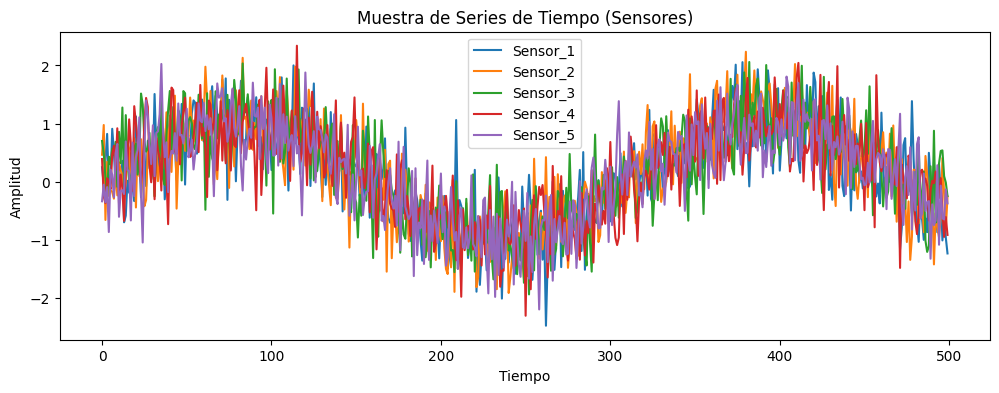

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos generados
df = pd.read_csv('datos_clean_graphs.csv')

# Visualización rápida de las primeras 5 series de tiempo
df.iloc[:, :5].plot(figsize=(12, 4), title="Muestra de Series de Tiempo (Sensores)")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()

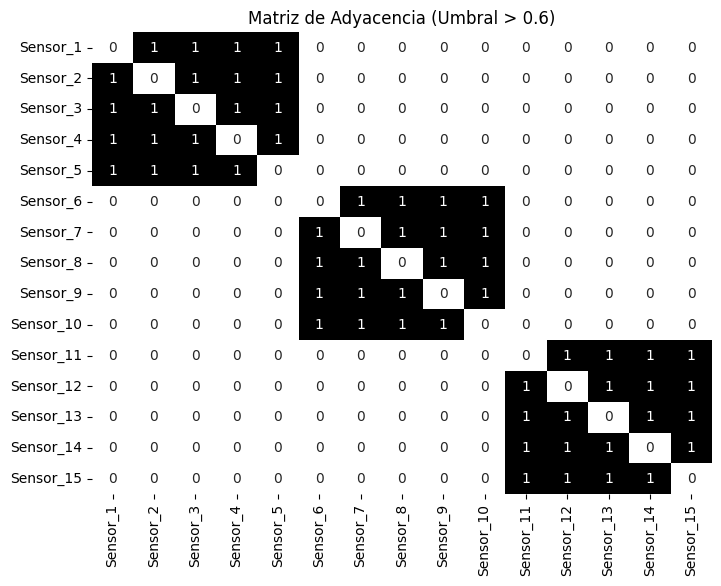

In [4]:
# 1. Calcular la matriz de correlación (Pesos de las aristas)
corr_matrix = df.corr()

# 2. Umbralización (Thresholding): Solo conexiones fuertes (p.e., > 0.6) se vuelven aristas
threshold = 0.6
adj_matrix = (corr_matrix.abs() > threshold).astype(int)

# Eliminar auto-conexiones (diagonales) para evitar bucles simples
np.fill_diagonal(adj_matrix.values, 0)

# Visualizar la matriz de adyacencia
plt.figure(figsize=(8, 6))
sns.heatmap(adj_matrix, annot=True, cmap="Greys", cbar=False)
plt.title(f"Matriz de Adyacencia (Umbral > {threshold})")
plt.show()

In [5]:
# Crear el grafo desde la matriz de adyacencia
G = nx.from_pandas_adjacency(adj_matrix)

# Medidas de Nodo (Centralidad)
degree_cent = nx.degree_centrality(G)      # Conectividad directa
between_cent = nx.betweenness_centrality(G) # Nodos que actúan como puentes (flujo)
closeness_cent = nx.closeness_centrality(G) # Nodos más "cercanos" a todos los demás

# Convertir a DataFrame para análisis pedagógico
metrics_df = pd.DataFrame({
    'Grado': degree_cent,
    'Intermediación': between_cent,
    'Cercanía': closeness_cent
})
print("Métricas de Centralidad por Nodo:")
print(metrics_df.head())

Métricas de Centralidad por Nodo:
             Grado  Intermediación  Cercanía
Sensor_1  0.285714             0.0  0.285714
Sensor_2  0.285714             0.0  0.285714
Sensor_3  0.285714             0.0  0.285714
Sensor_4  0.285714             0.0  0.285714
Sensor_5  0.285714             0.0  0.285714


In [6]:
# 1. Ruta más corta entre dos nodos específicos (ej. Sensor 1 al 15)
try:
    path = nx.shortest_path(G, source='Sensor_1', target='Sensor_15')
    print(f"Ruta más corta Sensor_1 -> Sensor_15: {path}")
except nx.NetworkXNoPath:
    print("No existe ruta entre los nodos seleccionados.")

# 2. Medidas de Complejidad y Conexión
density = nx.density(G) # Nivel de conexión (0 a 1)
avg_clustering = nx.average_clustering(G) # Nivel de agrupamiento local

print(f"Densidad de la Red: {density:.4f}")
print(f"Coeficiente de Agrupamiento Promedio: {avg_clustering:.4f}")

# 3. Componentes Conectadas (Redes Interconectadas)
subgrafos = list(nx.connected_components(G))
print(f"Número de sub-redes independientes: {len(subgrafos)}")

No existe ruta entre los nodos seleccionados.
Densidad de la Red: 0.2857
Coeficiente de Agrupamiento Promedio: 1.0000
Número de sub-redes independientes: 3


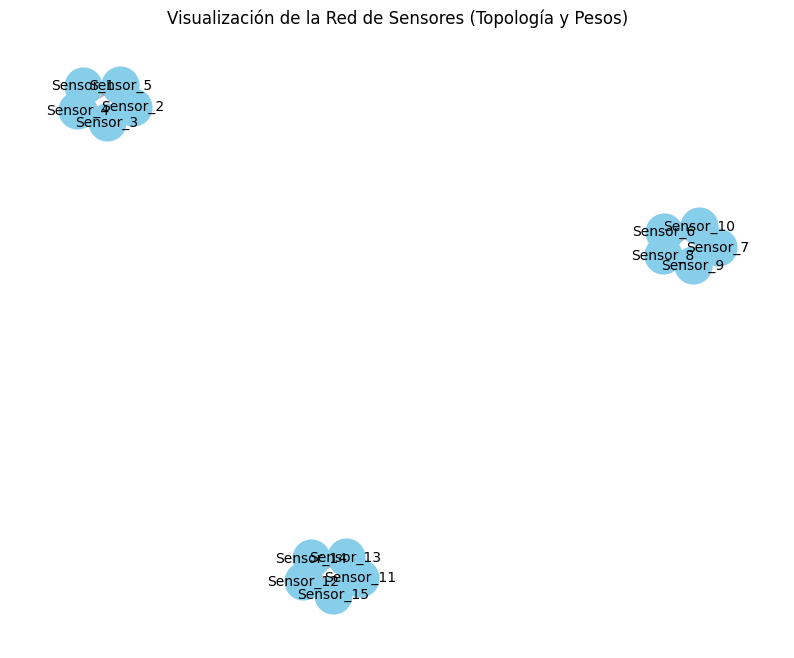

In [7]:
plt.figure(figsize=(10, 8))

# Posicionamiento elástico (Spring Layout) para ver clusters
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos, etiquetas y aristas
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Dibujar aristas con grosores basados en la correlación real
weights = [corr_matrix.loc[u, v] * 3 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.5)

plt.title("Visualización de la Red de Sensores (Topología y Pesos)")
plt.axis('off')
plt.show()